In [ ]:
!pip install -r "/content/drive/MyDrive/Colab Notebooks/LEVX_1km/requirements.txt"

In [ ]:
!pip install lazypredict

In [3]:
import plotly.express as px
import pandas as pd
import numpy as np
coor=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LEVX_1km/input_files/distan_lat42.22lon-8.63p2R1Km.csv")
px.set_mapbox_access_token("pk.eyJ1IjoiZ3JhbmFudHVpbiIsImEiOiJja3B4dGU4OTkwMTFmMm9ycnNhMjJvaGJqIn0.VWzx_PkD9A5cSUVsn_ijCA")
px.scatter_mapbox(coor, hover_data=['distance'],lat='lat', lon='lon',color='distance', title="Nearest points",
                           color_continuous_scale=px.colors.cyclical.IceFire,)

In [5]:
from scipy.stats import shapiro
import pandas as pd

station = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LEVX_1km/input_files/LEVX_20192020.csv",
                          usecols = ["time","tempd_o"],
                          parse_dates=["time"]).set_index("time")

#Shapiro test normality
print("Shapiro test normality")
sta, p = shapiro(station.tempd_o.sample(500))

print("\np value:",p)
#significance level alpha=0.01
alpha = 0.01
if p>alpha:
  print("Accept null hypothesis: normal distribution dew temperature variable\n")
else:
  print("Reject null Hypothesis. Alternative hypothesis variable no normal distribution dew temperature variable\n")  

(station["tempd_o"]-273.15).describe()

Shapiro test normality

p value: 0.00016363254690077156
Reject null Hypothesis. Alternative hypothesis variable no normal distribution dew temperature variable



count    41304.000000
mean        10.668071
std          4.327946
min        -17.000000
25%          8.000001
50%         11.000000
75%         14.000000
max         21.999999
Name: tempd_o, dtype: float64

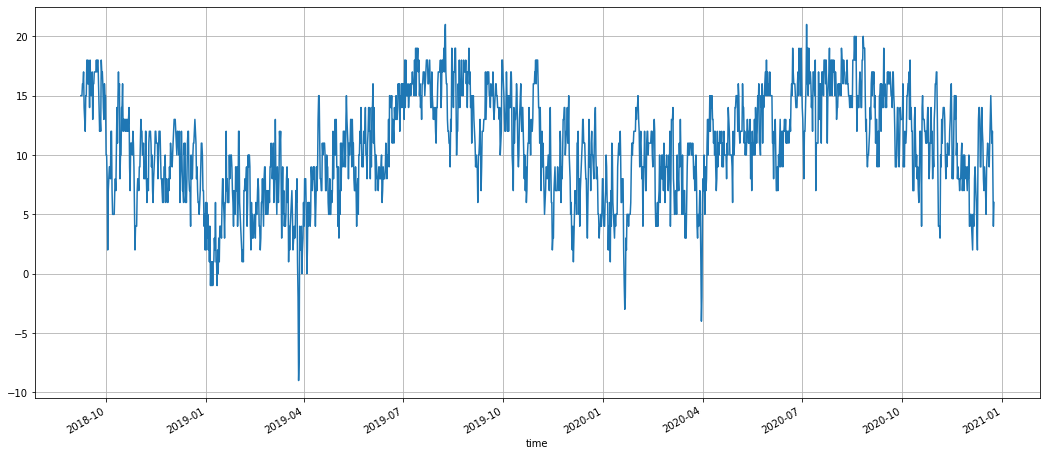

In [8]:
(station["tempd_o"]-273.15)[0::24].plot(figsize=(18, 8),grid =True,);

**Drop outliers. Cosider dew temperature below -5 C as an outlier**

In [14]:
station_clean = station[station.tempd_o>-10+273.15]
print((station_clean["tempd_o"]-273.15).describe())
(station_clean["tempd_o"]-273.15)[0::24].plot(figsize=(18, 8),grid =True,);

count    41290.000000
mean        10.676193
std          4.305969
min         -9.000000
25%          8.000001
50%         11.000000
75%         14.000000
max         21.999999
Name: tempd_o, dtype: float64

**Forecast D0**

In [6]:
#forecast d0
model1k = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LEVX_1km/input_files/lat42.22lon-8.63p2R1KmD0.csv",parse_dates=["time"]).drop(columns=["Unnamed: 0"]).set_index("time")
model1k

,dir0,snow_prec0,snowlevel0,mod0,wind_gust0,mslp0,temp0,rh0,visibility0,lhflx0,...,cape1,cin1,cfh1,cfl1,cfm1,cft1,HGT5001,HGT8501,T5001,T8501
time,,,,,,,,,,,,,,,,,,,,,
2019-01-01 01:00:00,143.268921,0.0,1801.360962,0.789023,1.467980,103158.796875,280.410004,0.823894,24135.000000,6.723936,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,5730.042969,1595.621948,253.857193,283.275238
2019-01-01 02:00:00,152.222214,0.0,1766.035156,1.437459,2.645142,103178.460938,279.987000,0.822755,24135.000000,6.389383,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,5729.319824,1597.058472,253.848557,282.842499
2019-01-01 03:00:00,154.053619,0.0,1728.199341,1.304144,2.414089,103142.132812,279.750885,0.820316,24135.000000,6.182112,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,5724.619141,1593.626953,253.876816,282.377808
2019-01-01 04:00:00,162.321548,0.0,1716.658325,1.242218,2.291945,103172.617188,279.614197,0.806320,24135.000000,6.556708,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,5725.305664,1596.243408,253.810440,282.195923
2019-01-01 05:00:00,167.243256,0.0,1718.675293,0.790160,1.460847,103175.796875,279.555634,0.787751,24135.000000,7.131637,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,5724.179199,1596.257935,253.821121,282.136566
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-31 19:00:00,316.116913,0.0,800.844543,5.403949,10.236845,101375.132812,279.880554,0.861849,24050.560547,28.912556,...,22.750000,-12.612812,0.0,0.000000,0.0,0.000000,5360.758301,1434.292603,243.570251,271.706177
2020-12-31 20:00:00,318.488983,0.0,708.539551,4.331174,8.753118,101517.437500,279.643799,0.881646,24048.224609,21.361237,...,34.250000,-4.223125,0.0,0.300000,0.1,0.300000,5362.556641,1437.166504,242.893250,271.008636
2020-12-31 21:00:00,314.300262,0.0,763.025513,3.515929,6.365382,101593.578125,279.461945,0.917659,24056.218750,13.615123,...,30.620001,-5.149188,0.0,0.070246,0.0,0.070246,5366.014160,1441.580811,242.227005,271.706116


In [15]:
#concat station model
df_all1k = pd.concat([station_clean,model1k],axis=1).dropna()
df_all1k

,tempd_o,dir0,snow_prec0,snowlevel0,mod0,wind_gust0,mslp0,temp0,rh0,visibility0,...,cape1,cin1,cfh1,cfl1,cfm1,cft1,HGT5001,HGT8501,T5001,T8501
time,,,,,,,,,,,,,,,,,,,,,
2019-01-01 01:00:00,275.149999,143.268921,0.0,1801.360962,0.789023,1.467980,103158.796875,280.410004,0.823894,24135.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,5730.042969,1595.621948,253.857193,283.275238
2019-01-01 02:00:00,275.149999,152.222214,0.0,1766.035156,1.437459,2.645142,103178.460938,279.987000,0.822755,24135.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,5729.319824,1597.058472,253.848557,282.842499
2019-01-01 03:00:00,276.150001,154.053619,0.0,1728.199341,1.304144,2.414089,103142.132812,279.750885,0.820316,24135.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,5724.619141,1593.626953,253.876816,282.377808
2019-01-01 04:00:00,276.150001,162.321548,0.0,1716.658325,1.242218,2.291945,103172.617188,279.614197,0.806320,24135.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,5725.305664,1596.243408,253.810440,282.195923
2019-01-01 05:00:00,275.149999,167.243256,0.0,1718.675293,0.790160,1.460847,103175.796875,279.555634,0.787751,24135.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,5724.179199,1596.257935,253.821121,282.136566
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-24 19:00:00,278.150000,9.241409,0.0,1114.372070,4.894399,7.983289,102750.492188,280.356812,0.850322,24155.681641,...,0.0,-0.000438,0.0,0.0,0.0,0.0,5529.350586,1529.656250,248.538376,273.540680
2020-12-24 20:00:00,278.150000,17.789364,0.0,1115.066650,5.159622,10.980127,102863.531250,280.214874,0.837604,24115.419922,...,0.0,0.000359,0.0,0.0,0.0,0.0,5534.803223,1534.443115,248.254623,273.497437
2020-12-24 21:00:00,278.150000,18.492819,0.0,1114.713379,4.304277,9.638730,102951.648438,280.168427,0.838092,24082.583984,...,0.0,-0.000215,0.0,0.0,0.0,0.0,5545.419434,1536.551025,248.680069,273.530487


**Meteorological model independent variables X**

In [18]:
df_all1k.iloc[:,1:].columns


Index(['dir0', 'snow_prec0', 'snowlevel0', 'mod0', 'wind_gust0', 'mslp0',
       'temp0', 'rh0', 'visibility0', 'lhflx0', 'lwflx0', 'conv_prec0',
       'prec0', 'swflx0', 'shflx0', 'cape0', 'cin0', 'cfh0', 'cfl0', 'cfm0',
       'cft0', 'HGT5000', 'HGT8500', 'T5000', 'T8500', 'dir1', 'snow_prec1',
       'snowlevel1', 'mod1', 'wind_gust1', 'mslp1', 'temp1', 'rh1',
       'visibility1', 'lhflx1', 'lwflx1', 'conv_prec1', 'prec1', 'swflx1',
       'shflx1', 'cape1', 'cin1', 'cfh1', 'cfl1', 'cfm1', 'cft1', 'HGT5001',
       'HGT8501', 'T5001', 'T8501'],
      dtype='object')

**Find ML algorithm**

In [20]:
from sklearn.model_selection import train_test_split
import lazypredict
from lazypredict.Supervised import LazyRegressor

# X and Y
Y = round(df_all1k["tempd_o"])-273.15
X = df_all1k.iloc[:,1:]


X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, )


multiple_model = LazyRegressor(verbose =0, ignore_warnings = True,predictions=True)
models,predictions = multiple_model.fit(X_train,X_test,y_train,y_test)

 95%|█████████▌| 39/41 [04:55<00:09,  4.79s/it]

[07:55:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


100%|██████████| 41/41 [05:01<00:00,  7.35s/it]


In [21]:
models

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
ExtraTreesRegressor,0.94,0.94,1.10,11.73
RandomForestRegressor,0.92,0.92,1.21,38.99
LGBMRegressor,0.92,0.92,1.22,1.67
HistGradientBoostingRegressor,0.92,0.92,1.22,1.38
BaggingRegressor,0.92,0.92,1.26,4.01
MLPRegressor,0.91,0.91,1.28,19.21
SVR,0.90,0.91,1.35,17.13
NuSVR,0.90,0.90,1.36,15.89
GradientBoostingRegressor,0.90,0.90,1.41,17.40


**LGBMRegressor (y_test from lazypredict)**

In [22]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import r2_score


Mean_AE = round(mean_absolute_error(y_test, predictions.LGBMRegressor),2)
MSE = round(mean_squared_error(y_test, predictions.LGBMRegressor),2)
R2 = round(r2_score(y_test, predictions.LGBMRegressor),2)
Median_AE = round(median_absolute_error(y_test, predictions.LGBMRegressor),2)

print(pd.DataFrame({"Mean_AE":Mean_AE,"MSE":MSE,"R2":R2,"Median_AE":Median_AE},index=["results LGBMRegressor"]))



                       Mean_AE  MSE   R2  Median_AE
results LGBMRegressor     0.90 1.49 0.92       0.68


**ExtraTreesRegressor (y_test from lazypredict)**

In [23]:
Mean_AE = round(mean_absolute_error(y_test, predictions.ExtraTreesRegressor),2)
MSE = round(mean_squared_error(y_test, predictions.ExtraTreesRegressor),2)
R2 = round(r2_score(y_test, predictions.ExtraTreesRegressor),2)
Median_AE = round(median_absolute_error(y_test, predictions.ExtraTreesRegressor),2)

print(pd.DataFrame({"Mean_AE":Mean_AE,"MSE":MSE,"R2":R2,"Median_AE":Median_AE},index=["results ExtraTreesRegressor"]))

                             Mean_AE  MSE   R2  Median_AE
results ExtraTreesRegressor     0.78 1.22 0.94       0.58


**LGBMRegressor ML algorithm selected**

In [25]:
from lightgbm.sklearn import LGBMRegressor
from sklearn.model_selection import train_test_split

#random seed 1
np.random.seed(1)

# X and Y
Y = df_all1k.tempd_o
X = df_all1k.iloc[:,1:]

# loop random
Median_AE_ml = []
Mean_AE_ml =[]
MSE_ml = []
R2_ml = []

#20 samples to test algorithm
for t in range (0,20):
  #split variables
  X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.15, )

  #machine learning model
  ml_model = LGBMRegressor().fit(X_train,y_train)
  y_pred = ml_model.predict(X_test)
  
  #Score calculation
  Mean_AE_ml.append(round(mean_absolute_error(y_test, y_pred),2))
  Median_AE_ml.append(round(median_absolute_error(y_test, y_pred),2))
  MSE_ml.append (round(mean_squared_error(y_test, y_pred),2))
  R2_ml.append(round(r2_score(y_test, y_pred),2))
  
  
print(pd.DataFrame({"Median_AE":Median_AE_ml," Mean_AE":Mean_AE_ml,"MSE":MSE_ml,"R2":R2_ml}))



    Median_AE   Mean_AE  MSE   R2
0        0.68      0.89 1.39 0.93
1        0.69      0.87 1.31 0.93
2        0.72      0.91 1.45 0.92
3        0.73      0.89 1.37 0.93
4        0.68      0.89 1.44 0.93
5        0.74      0.92 1.46 0.92
6        0.72      0.90 1.43 0.93
7        0.72      0.88 1.36 0.93
8        0.71      0.89 1.35 0.93
9        0.73      0.90 1.36 0.93
10       0.69      0.89 1.41 0.93
11       0.71      0.91 1.46 0.93
12       0.71      0.88 1.35 0.93
13       0.69      0.89 1.42 0.93
14       0.72      0.90 1.43 0.93
15       0.72      0.93 1.56 0.92
16       0.69      0.89 1.41 0.93
17       0.70      0.90 1.44 0.93
18       0.70      0.90 1.48 0.93
19       0.73      0.91 1.42 0.93


**Add time variables**

In [26]:
df_all1k["hour"] = df_all1k.index.hour
df_all1k["month"] = df_all1k.index.month
df_all1k["dayofyear"] = df_all1k.index.dayofyear
df_all1k["weekofyear"] = df_all1k.index.isocalendar().week.astype(int)

**Machine learning with time variables**

In [41]:
#random seed 1
np.random.seed(1)

# X and Y
Y = df_all1k.tempd_o
X = df_all1k.iloc[:,1:]

# loop random
Median_AE_ml_t = []
Mean_AE_ml_t =[]
MSE_ml_t = []
R2_ml_t = []

#20 samples to test algorithm
for t in range (0,20):
  #split variables
  X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.15, )

  #machine learning model
  ml_model = LGBMRegressor().fit(X_train,y_train)
  #ml_model =ExtraTreesRegressor().fit(X_train,y_train)
  y_pred = ml_model.predict(X_test)
  
  #Score calculation
  Mean_AE_ml_t.append(round(mean_absolute_error(y_test, y_pred),2))
  Median_AE_ml_t.append(round(median_absolute_error(y_test, y_pred),2))
  MSE_ml_t.append (round(mean_squared_error(y_test, y_pred),2))
  R2_ml_t.append(round(r2_score(y_test, y_pred),2))
  
  
print(pd.DataFrame({"Median_AE":Median_AE_ml_t," Mean_AE":Mean_AE_ml_t,"MSE":MSE_ml_t,"R2":R2_ml_t}))

    Median_AE   Mean_AE  MSE   R2
0        0.66      0.83 1.21 0.94
1        0.65      0.82 1.16 0.94
2        0.69      0.85 1.27 0.93
3        0.66      0.84 1.20 0.94
4        0.65      0.84 1.27 0.93
5        0.69      0.86 1.29 0.93
6        0.67      0.85 1.30 0.93
7        0.68      0.84 1.24 0.94
8        0.66      0.83 1.20 0.94
9        0.68      0.83 1.15 0.94
10       0.66      0.84 1.24 0.94
11       0.67      0.85 1.29 0.93
12       0.67      0.84 1.21 0.94
13       0.68      0.84 1.24 0.94
14       0.67      0.85 1.28 0.93
15       0.68      0.87 1.36 0.93
16       0.68      0.84 1.23 0.94
17       0.65      0.84 1.24 0.94
18       0.66      0.84 1.28 0.94
19       0.69      0.86 1.26 0.94


**T test two related samples. This is a test for the null hypothesis that two related samples have identical Median Absolute Error. Alternative hypothesis the Median Absolute Error of the distribution underlying the sample with time variables is less than the Median Absolute Error of the distribution underlying the sample without time variables. Significance level (alpha) = 0.01**

In [35]:
from scipy import stats

alpha = 0.01
sta, p_value = stats.ttest_rel(Median_AE_ml_t, Median_AE_ml, alternative="less")

print("\nMedian absolute error without time variables:", Median_AE_ml)
print("\nMedian absolute error with time variables:", Median_AE_ml_t)

print("\nalpha: ",alpha)

print("\np_value point: ",p_value)
if p_value < alpha:    
    print("\nwe are rejecting null hypothesis  H0: Median absolute error machine learning without time variables = Median absolute error machine learning with time variables")
    print("\nwe are accepting alternative hypothesis: Median absolute error of the sample without time variables inputs is less than the Median absolute error of the sample with time variables inputs")
else:
    print("\nwe are accepting null hypothesis:  H0: Median absolute error machine learning without time variables = Median absolute error machine learning with time variables")


Median absolute error without time variables: [0.68, 0.69, 0.72, 0.73, 0.68, 0.74, 0.72, 0.72, 0.71, 0.73, 0.69, 0.71, 0.71, 0.69, 0.72, 0.72, 0.69, 0.7, 0.7, 0.73]

Median absolute error with time variables: [0.66, 0.65, 0.69, 0.66, 0.65, 0.69, 0.67, 0.68, 0.66, 0.68, 0.66, 0.67, 0.67, 0.68, 0.67, 0.68, 0.68, 0.65, 0.66, 0.69]

alpha:  0.01

p_value point:  1.2062467462146931e-10

we are rejecting null hypothesis  H0: Median absolute error machine learning without time variables = Median absolute error machine learning with time variables

we are accepting alternative hypothesis: Median absolute error of the sample without time variables inputs is less than the Median absolute error of the sample with time variables inputs


**Save algorithm**

In [37]:
import pickle
from sklearn.pipeline import Pipeline

x_var = df_all1k.iloc[:,1:].columns
estimators = [('ml_model', ml_model)]
pipe = Pipeline(estimators)
print(pipe)
al_file={"x_var":x_var,"coor":coor,"pipe":pipe}
pickle.dump(al_file, open("tempd_LEVX_1km_time_d0.al", 'wb'))

Pipeline(steps=[('ml_model', LGBMRegressor())])


**ExtraTreesRegressor too heavy to be upload at github**

In [39]:
from sklearn.ensemble import ExtraTreesRegressor

#random seed 1
np.random.seed(1)

# X and Y
Y = df_all1k.tempd_o
X = df_all1k.iloc[:,1:]

# loop random
Median_AE_ml_p = []
Mean_AE_ml_p =[]
MSE_ml_p = []
R2_ml_p = []

#20 samples to test algorithm
for t in range (0,20):
  #split variables
  X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.15, )

  #machine learning model
  ml_model =ExtraTreesRegressor().fit(X_train,y_train)
  y_pred = ml_model.predict(X_test)
  
  #Score calculation
  Mean_AE_ml_p.append(round(mean_absolute_error(y_test, y_pred),2))
  Median_AE_ml_p.append(round(median_absolute_error(y_test, y_pred),2))
  MSE_ml_p.append (round(mean_squared_error(y_test, y_pred),2))
  R2_ml_p.append(round(r2_score(y_test, y_pred),2))
  
  
print(pd.DataFrame({"Median_AE":Median_AE_ml_p," Mean_AE":Mean_AE_ml_p,"MSE":MSE_ml_p,"R2":R2_ml_p}))

    Median_AE   Mean_AE  MSE   R2
0        0.52      0.69 0.91 0.96
1        0.54      0.72 0.99 0.95
2        0.53      0.70 0.94 0.95
3        0.55      0.71 0.94 0.95
4        0.54      0.70 0.92 0.95
5        0.55      0.72 0.98 0.95
6        0.55      0.72 0.98 0.95
7        0.55      0.72 1.04 0.95
8        0.55      0.71 0.92 0.95
9        0.54      0.70 0.88 0.96
10       0.53      0.71 0.95 0.95
11       0.52      0.71 0.99 0.95
12       0.51      0.68 0.86 0.95
13       0.54      0.71 0.95 0.95
14       0.54      0.70 0.93 0.95
15       0.53      0.72 1.05 0.95
16       0.54      0.71 0.98 0.95
17       0.53      0.71 0.93 0.95
18       0.53      0.70 0.98 0.95
19       0.54      0.70 0.96 0.95


**T test two related samples. This is a test for the null hypothesis that two related samples have identical Median Absolute Error. Alternative hypothesis the Median Absolute Error of the distribution underlying the LGBMRegressor algorithm is less than the Median Absolute Error of the distribution underlying the ExtraTreesRegressor algorithm. Significance level (alpha) = 0.01**

In [43]:
alpha = 0.01
sta, p_value = stats.ttest_rel(Median_AE_ml_p, Median_AE_ml_t, alternative="less")

print("\nMedian absolute error with LGBMRegressor :", Median_AE_ml_t)
print("\nMedian absolute error with ExtraTreesRegressor:", Median_AE_ml_p)

print("\nalpha: ",alpha)

print("\np_value point: ",p_value)
if p_value < alpha:    
    print("\nwe are rejecting null hypothesis  H0: Median absolute error LGBMRegressor = Median absolute error ExtraTreesRegressor ")
    print("\nwe are accepting alternative hypothesis: Median absolute error ExtraTreesRegressor is less than the Median absolute error  LGBMRegressor ")
else:
    print("\nwe are accepting null hypothesis:  H0: Median absolute error LGBMRegressor = Median absolute error ExtraTreesRegressor")


Median absolute error with LGBMRegressor : [0.66, 0.65, 0.69, 0.66, 0.65, 0.69, 0.67, 0.68, 0.66, 0.68, 0.66, 0.67, 0.67, 0.68, 0.67, 0.68, 0.68, 0.65, 0.66, 0.69]

Median absolute error with ExtraTreesRegressor: [0.52, 0.54, 0.53, 0.55, 0.54, 0.55, 0.55, 0.55, 0.55, 0.54, 0.53, 0.52, 0.51, 0.54, 0.54, 0.53, 0.54, 0.53, 0.53, 0.54]

alpha:  0.01

p_value point:  2.197397821436138e-19

we are rejecting null hypothesis  H0: Median absolute error LGBMRegressor = Median absolute error ExtraTreesRegressor 

we are accepting alternative hypothesis: Median absolute error ExtraTreesRegressor is less than the Median absolute error  LGBMRegressor 
